In [ ]:
# All the imports
import acquire as a
import prepare as p
# tabular manipulation
import numpy as np
import pandas as pd
# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Questions:
1.) Does paperless billing affect churn
2.) does streaming tv affect churn
3.) does streaming movies affect churn
4.) does tech support affect churn

In [2]:
telco = a.get_telco_data()

this file exists, reading from csv


In [3]:
telco = p.prep_telco(telco)
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [4]:
telco.monthly_charges.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: monthly_charges, Length: 7043, dtype: bool

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [6]:
telco['internet_service_type'] = telco['internet_service_type'].fillna('None')

In [11]:
train, val, test = p.splitting_data(telco, 'churn')

In [10]:
telco_train, telco_val, telco_test = p.splitting_data(telco, 'churn')

In [11]:
train_encode, val_encode, test_encode = p.preprocess_telco(telco_train,telco_val,telco_test)

In [15]:
train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 8775-CEBBJ to 1078-TDCRN
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   int64  
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

In [11]:
train_encode.senior_citizen.value_counts()

senior_citizen
0    3575
1     650
Name: count, dtype: int64

In [47]:
X_train, y_train = train_encode.drop(columns='churn_Yes'), \
train_encode.churn_Yes

In [48]:
X_val, y_val = val_encode.drop(columns='churn_Yes'), \
val_encode.churn_Yes

In [49]:
X_test, y_test = test_encode.drop(columns='churn_Yes'), \
test_encode.churn_Yes

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 8775-CEBBJ to 1078-TDCRN
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   int64  
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

In [6]:
# replaces values in the total charges column with a blank space to 0.0
telco.total_charges = telco.total_charges.str.replace(' ','0.0')

In [7]:
# changes total_charges to a float instead of an object
telco['total_charges'] = (telco.total_charges + '0').astype(float)

In [8]:
telco = telco.set_index(['customer_id'])

In [18]:
train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 8775-CEBBJ to 1078-TDCRN
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   int64  
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

## EXPLORE

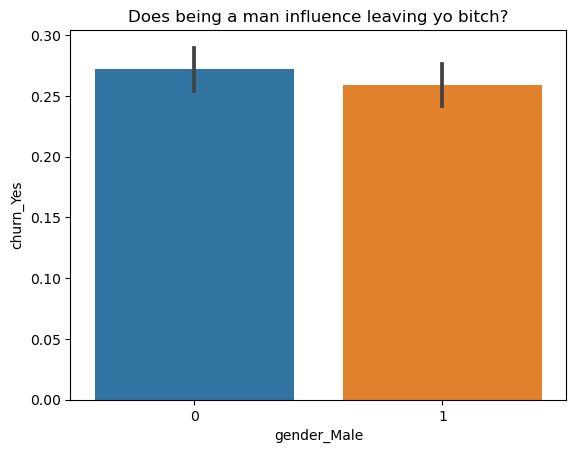

In [24]:
sns.barplot(data=train_encode, x='gender_Male', y='churn_Yes')
plt.title("Does being a man influence leaving yo bitch?")
plt.show()


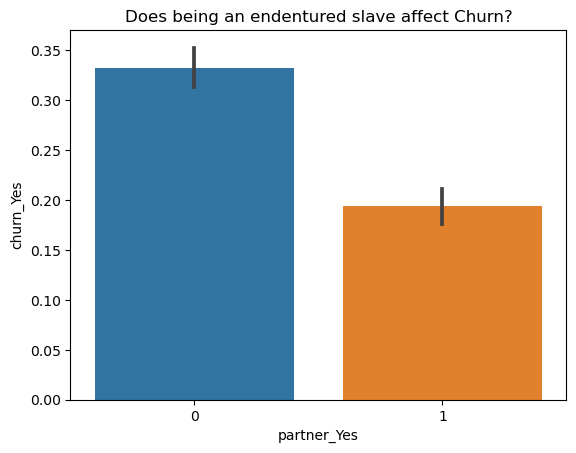

In [28]:
sns.barplot(data=train_encode, x='partner_Yes', y='churn_Yes')
plt.title("Does being an endentured slave affect Churn?")
plt.show()


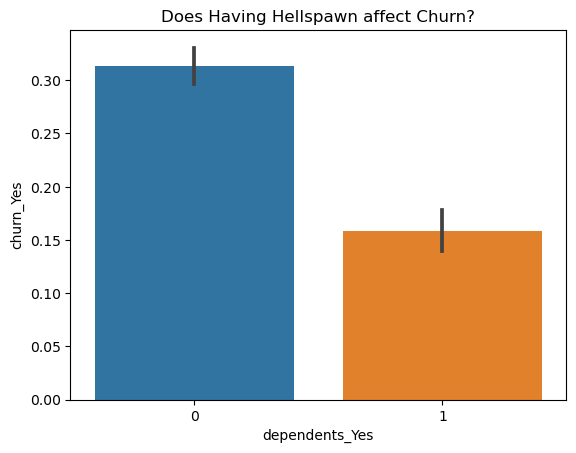

In [29]:
sns.barplot(data=train_encode, x='dependents_Yes', y='churn_Yes')
plt.title("Does Having Hellspawn affect Churn?")
plt.show()


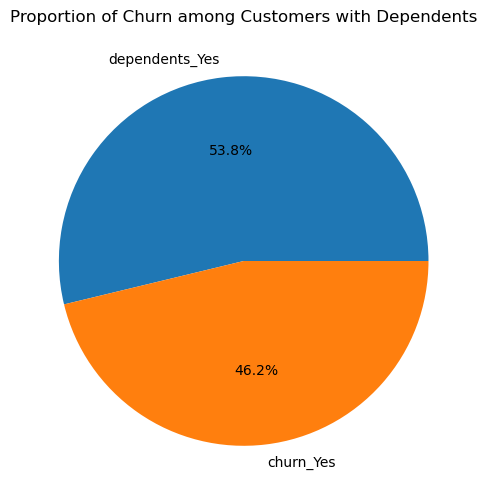

In [103]:
import matplotlib.pyplot as plt

# Assuming train_encode contains your data
# Create a subset for 'dependents_Yes' and 'churn_Yes' columns
dependents_churn = train_encode[['dependents_Yes', 'churn_Yes']]

# Count the occurrences of each category
count_dependents_churn = dependents_churn.apply(pd.Series.value_counts).T

# Plotting a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(count_dependents_churn[1], labels=count_dependents_churn.index, autopct='%1.1f%%')
plt.title("Proportion of Churn among Customers with Dependents")
plt.show()

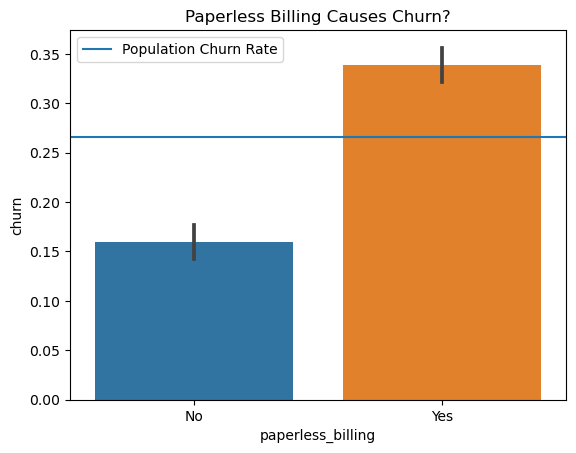

In [79]:
sns.barplot(data=telco_train, x='paperless_billing', y='churn')
plt.title("Paperless Billing Causes Churn?")
population_churn = telco_train.churn.mean()
plt.axhline(population_churn, label="Population Churn Rate")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend()
plt.show()


In [44]:
# Let's run a chi squared to compare proportions, to have more confidence
α = 0.05
null_hypothesis = "there is NO relationship between gender and churn"
alternative_hypothesis = "there is a relationship between gender and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_encode.churn_Yes, train_encode.gender_Male)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print(f"Reject the null hypothesis that, {null_hypothesis}")
    print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Fail to reject the null
Insufficient evidence to reject the null


0.34677390607565795

In [45]:
# Let's run a chi squared to compare proportions, to have more confidence
α = 0.05
null_hypothesis = "there is NO relationship between having a parnter and churn"
alternative_hypothesis = "there is a relationship between having a parnter and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_encode.churn_Yes, train_encode.partner_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print(f"Reject the null hypothesis that, {null_hypothesis}")
    print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that, there is NO relationship between having a parnter and churn
Sufficient evidence to move forward understanding that, there is a relationship between having a parnter and churn


3.3117883244850396e-24

In [43]:
# Let's run a chi squared to compare proportions, to have more confidence
α = 0.05
null_hypothesis = "there is NO relationship between having dependents and churn"
alternative_hypothesis = "there is a relationship between having dependents and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_encode.churn_Yes, train_encode.dependents_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print(f"Reject the null hypothesis that, {null_hypothesis}")
    print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that, There is NO relationship between having dependents and churn
Sufficient evidence to move forward understanding that, There is a relationship between having dependents and churn


6.84215803296947e-26

In [37]:
# Let's run a chi squared to compare proportions, to have more confidence
α = 0.05
null_hypothesis = "there is NO relationship between paperless billing and churn"
alternative_hypothesis = "there is a relationship between paperless billing and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_encode.churn_Yes, train_encode.paperless_billing_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print(f"Reject the null hypothesis that, {null_hypothesis}")
    print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that, There is NO relationship between paperless billing and churn
Sufficient evidence to move forward understanding that, There is a relationship between paperless billing and churn


5.802667394637569e-38

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 8775-CEBBJ to 1078-TDCRN
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         4225 non-null   int64  
 1   tenure                                 4225 non-null   int64  
 2   monthly_charges                        4225 non-null   int64  
 3   total_charges                          4225 non-null   float64
 4   gender_Male                            4225 non-null   int64  
 5   partner_Yes                            4225 non-null   int64  
 6   dependents_Yes                         4225 non-null   int64  
 7   phone_service_Yes                      4225 non-null   int64  
 8   multiple_lines_No phone service        4225 non-null   int64  
 9   multiple_lines_Yes                     4225 non-null   int64  
 10  online_security_No internet service    4225 non-null   int64  

In [51]:
y_train.value_counts()

churn_Yes
0    3104
1    1121
Name: count, dtype: int64

In [52]:
baseline = telco.churn.mode()
baseline

0    No
Name: churn, dtype: object

In [53]:
baseline_percentage_no = (telco.churn == "No").mean()
baseline_percentage_no

0.7346301292063041

In [54]:
baseline_percentage_yes = (telco.churn == "Yes").mean()
baseline_percentage_yes

0.2653698707936959

In [79]:
# DECISION TREE
# creates a for loop iterating 20 times with a different max depth each iteration.
for x in range(1,21):
    #create the decision tree object
    tree = DecisionTreeClassifier(max_depth=x, random_state=24)
    #fit the object only on TRAIN DATA!
    tree.fit(X_train, y_train)
    #calculate the accuracy for train and validate
    acc = tree.score(X_train, y_train)
    acc_v = tree.score(X_val, y_val)
    print(f'max depth of {x}, the accuracy train = {round(acc,4)}, val = {round(acc_v,4)}')

max depth of 1, the accuracy train = 0.7347, val = 0.7346
max depth of 2, the accuracy train = 0.7922, val = 0.7906
max depth of 3, the accuracy train = 0.7922, val = 0.7906
max depth of 4, the accuracy train = 0.7991, val = 0.7892
max depth of 5, the accuracy train = 0.8116, val = 0.7842
max depth of 6, the accuracy train = 0.8187, val = 0.7807
max depth of 7, the accuracy train = 0.8279, val = 0.775
max depth of 8, the accuracy train = 0.84, val = 0.7658
max depth of 9, the accuracy train = 0.8651, val = 0.7523
max depth of 10, the accuracy train = 0.8859, val = 0.7452
max depth of 11, the accuracy train = 0.9082, val = 0.714
max depth of 12, the accuracy train = 0.9252, val = 0.7211
max depth of 13, the accuracy train = 0.946, val = 0.704
max depth of 14, the accuracy train = 0.9612, val = 0.7069
max depth of 15, the accuracy train = 0.9751, val = 0.6984
max depth of 16, the accuracy train = 0.9849, val = 0.6934
max depth of 17, the accuracy train = 0.9901, val = 0.6969
max depth of

In [77]:
y_pred = telco_tree.predict(X_train)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [78]:
telco_tree.score(X_train, y_train)

0.792189349112426

In [25]:
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,3104,0
1,4,1117


In [80]:
from sklearn.ensemble import RandomForestClassifier

for x in range(1, 21):
    # Create the RandomForestClassifier object
    forest = RandomForestClassifier(n_estimators=100, max_depth=x, random_state=24)
    
    # Fit the model on the training data
    forest.fit(X_train, y_train)
    
    # Calculate the accuracy
    acc = forest.score(X_train, y_train)
    
    print(f'With a max depth of {x}, the accuracy is {round(acc, 2)}')


With a max depth of 1, the accuracy is 0.73
With a max depth of 2, the accuracy is 0.76
With a max depth of 3, the accuracy is 0.79
With a max depth of 4, the accuracy is 0.8
With a max depth of 5, the accuracy is 0.8
With a max depth of 6, the accuracy is 0.81
With a max depth of 7, the accuracy is 0.82
With a max depth of 8, the accuracy is 0.84
With a max depth of 9, the accuracy is 0.86
With a max depth of 10, the accuracy is 0.88
With a max depth of 11, the accuracy is 0.91
With a max depth of 12, the accuracy is 0.95
With a max depth of 13, the accuracy is 0.97
With a max depth of 14, the accuracy is 0.98
With a max depth of 15, the accuracy is 0.99
With a max depth of 16, the accuracy is 1.0
With a max depth of 17, the accuracy is 1.0
With a max depth of 18, the accuracy is 1.0
With a max depth of 19, the accuracy is 1.0
With a max depth of 20, the accuracy is 1.0


In [96]:
#make it
lr = LogisticRegression()

#fit it
lr.fit(X_train[features], y_train)

features = ['gender_Male', 'partner_Yes', 'dependents_Yes', 'paperless_billing_Yes']
lr.score(X_train[features], y_train)

0.7346745562130178